In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [14]:
def random_color():
    return np.random.randint(0, 255, 3)

random_color()

array([249, 149, 251])

In [122]:
class Grid:
    def __init__(self, dim=5):
        self.dim = dim
        self.grid = np.array([[random_color() for _ in range(dim)] for _ in range(dim)])
        
    def plot(self):
        plt.imshow(self.grid)
        
    def convolve(self, f, **kwargs):
        out = self.grid.copy()
        for i in range(self.dim):
            for j in range(self.dim):
                neighbors = self._get_neighbors(i, j)
                out[i, j] = f(neighbors, **kwargs)
        self.grid = out
                
    def _get_neighbors(self, i, j):
        neighbors = [
            self.grid[(i - 1) % self.dim, j],
            self.grid[(i + 1) % self.dim, j], 
            self.grid[i, (j - 1) % self.dim],
            self.grid[i, (j + 1) % self.dim]]
        return neighbors

In [123]:
def get_means(neighbors):
    means = (neighbors[0] + neighbors[1] + neighbors[2] + neighbors[3]) / 4
    return np.round(means).astype(int)

In [124]:
def get_sums(neighbors):
    sums = (neighbors[0] + neighbors[1] + neighbors[2] + neighbors[3])
    return ((sums % 256).astype(int))

In [125]:
def get_means_until(neighbors, thresh=1):
    means = (neighbors[0] + neighbors[1] + neighbors[2] + neighbors[3]) / 4
    new = np.round(means).astype(int)
    for neighbor in neighbors:
        if abs(neighbor.sum() - new.sum()) <= thresh:
            new = random_color()
            return new
    return new

In [126]:
def get_weighted_sum(neighbors, w=[0, 1, 2, 4]):
    w = np.array(w)
    w = w / w.sum()
    new = np.dot(w, neighbors)
    return new

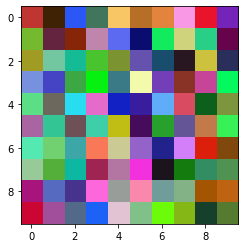

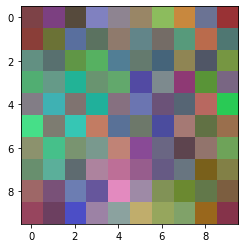

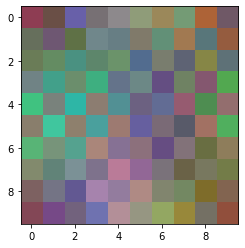

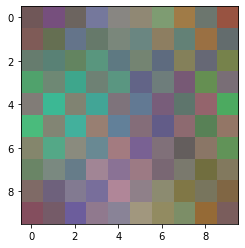

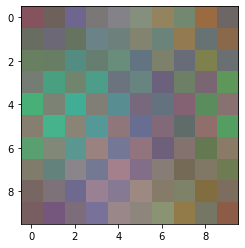

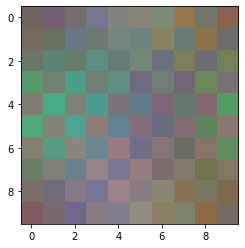

In [134]:
grid = Grid(10)
grid.plot()
for i in range(5):
    grid.convolve(get_means)
    plt.figure()
    grid.plot()

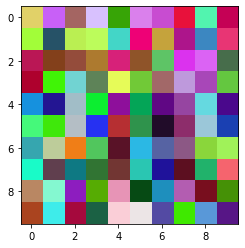

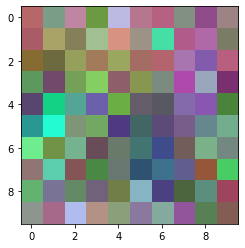

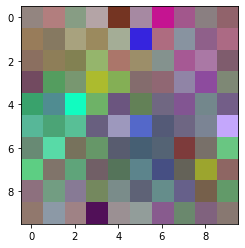

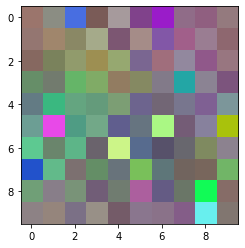

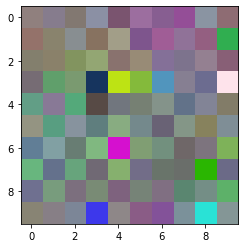

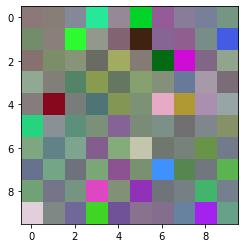

In [129]:
grid = Grid(10)
grid.plot()
for i in range(5):
    grid.convolve(get_means_until)
    plt.figure()
    grid.plot()

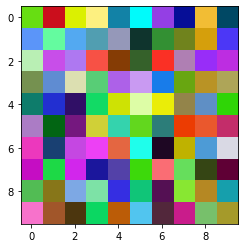

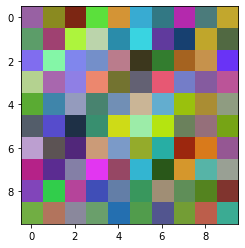

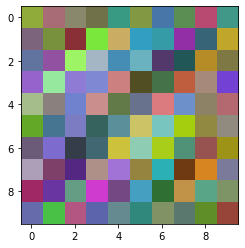

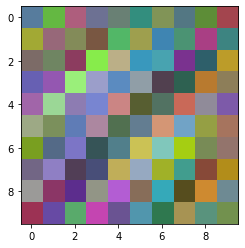

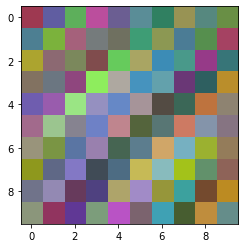

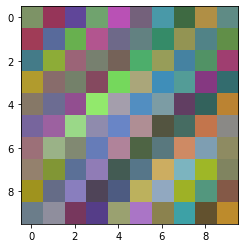

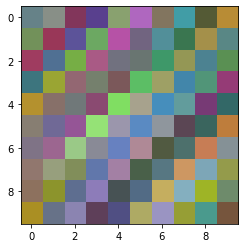

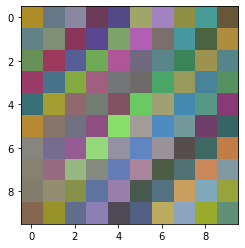

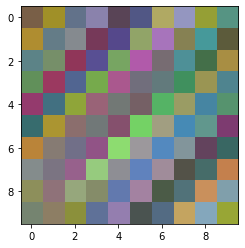

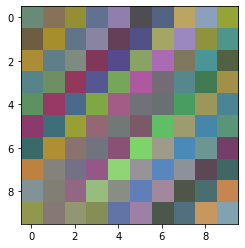

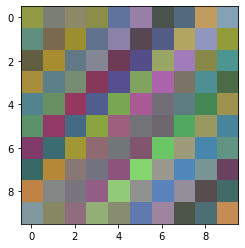

In [133]:
grid = Grid(10)
grid.plot()
for i in range(10):
    grid.convolve(get_weighted_sum, w=[80, 0, 50, 0])
    plt.figure()
    grid.plot()